In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [3]:
def fill_missing_labels(data, m, n):
    '''
    Fills missing values for a specific polygon feature (m) in the projected data by sampling from the values of another label (n).

    Arguments: 
        Data (DataFrame): a four-column DataFrame with the pre-existing data
        m: label that needs to be filled
        n: label from which values for 'm' will be sampled

    Returns:
        pd.DataFrame: The df with missing values for label 'm' filled
    '''

    rows_to_fill = data.iloc[:,2] == m
    rows_to_sample = data.iloc[:,2] == n

    sample_values = data.loc[rows_to_sample, "Var4"].dropna().values

    num_to_fill = rows_to_fill.sum()
    sampled_values = np.random.choice(sample_values, size=num_to_fill, replace=True)
    
    data.loc[rows_to_fill, "Var4"] = sampled_values

    return data

In [4]:
polygon_types = {
    1: 'Trough & LCP',
    2: 'Trough & FCP',
    3: 'Trough & HCP',
    4: 'Center & LCP',
    5: 'Center & FCP',
    7: 'High & LCP',
    8: 'High & FCP',
    9: 'High & HCP'
}



path_to_projections = "/Users/colettebrown/Library/CloudStorage/GoogleDrive-coletteb@berkeley.edu/Shared drives/Tram/data/projections/"
group_order = ['spring_snow_', 'spring_transition_', 'spring_no_snow_', 'peak_NDVI_']
variables = ['Albedo']
years = ['2014', '2015', '2016', '2017']

In [5]:
all_data = pd.DataFrame()
LCP_to_HCP = pd.DataFrame()
FCP_to_HCP = pd.DataFrame()

for group in group_order:
    for variable in variables:
        file_pattern = os.path.join(path_to_projections, f"{group}{variable}_*.txt")
        for file in glob.glob(file_pattern):
            file_name = os.path.basename(file)
            year = file_name[-8:-4]
            print(year)
            
            df = pd.read_csv(file)
            
            # create regular dataset 
            df['Day'] = group
            df['Year'] = year
            all_data = pd.concat([all_data, df], ignore_index=True)
            # all_data.to_csv("all_projected_data_albedo.csv")

            # resampling if HCP = LCP
            resample_trough_LCP = fill_missing_labels(df, m=3, n=1)
            resample_high_LCP = fill_missing_labels(df, m=9, n=7)
            resample_high_LCP['Day'] = group
            resample_high_LCP['Year'] = year
            LCP_to_HCP = pd.concat([LCP_to_HCP, resample_high_LCP], ignore_index=True)
            # resample_high_LCP.to_csv(f'data/LCP_sensitivity_{group}{variable}_{year}.csv', header=True, index=False)

            # resampling if HCP = FCP
            resample_trough_FCP = fill_missing_labels(df, m=3, n=2)
            resample_high_FCP = fill_missing_labels(df, m=9, n=8)
            resample_high_FCP['Day'] = group
            resample_high_FCP['Year'] = year
            FCP_to_HCP = pd.concat([FCP_to_HCP, resample_high_FCP], ignore_index=True)
            # resample_high_FCP.to_csv(f'data/FCP_sensitivity_{group}{variable}_{year}.csv', header=True, index=False)
            

2016
2017
2014
2014
2016
2017
2015
2016
2014
2017
2015
2014


In [6]:
all_data

,e05,e06,e00,Var4,Day,Year
0,585332.46,7909903.8,8.0,0.792,spring_snow_,2016
1,585332.46,7909904.3,8.0,0.818,spring_snow_,2016
2,585332.46,7909904.8,8.0,0.818,spring_snow_,2016
3,585332.46,7909905.3,8.0,0.798,spring_snow_,2016
4,585332.46,7909905.8,8.0,0.814,spring_snow_,2016
...,...,...,...,...,...,...
24605059,585992.96,7910676.8,NaN,0.000,peak_NDVI_,2014
24605060,585992.96,7910677.3,NaN,0.000,peak_NDVI_,2014
24605061,585992.96,7910677.8,NaN,0.000,peak_NDVI_,2014
24605062,585992.96,7910678.3,NaN,0.000,peak_NDVI_,2014


In [7]:
print("% of points = LCP: ", ((len(all_data[(all_data['e00'] == 1) | (all_data['e00'] == 4) | (all_data['e00'] == 7)]))/len(all_data))*100)
print("% of points = FCP: ",((len(all_data[(all_data['e00'] == 2) | (all_data['e00'] == 5) | (all_data['e00'] == 8)]))/len(all_data))*100)
print("% of points = HCP: ",((len(all_data[(all_data['e00'] == 3) | (all_data['e00'] == 9)]))/len(all_data))*100)

% of points = LCP:  23.745014440929722
% of points = FCP:  36.97385221188614
% of points = HCP:  6.895556134298209


## Comparing descriptive statistics of FCP, LCP replacement

In [8]:
print('All Data no HCP Mean: ', all_data[(all_data['e00'] != 3) & (all_data['e00'] != 9)]['Var4'].mean(), ', median:', all_data[(all_data['e00'] != 3) & (all_data['e00'] != 9)]['Var4'].median(), ', stdev:', all_data[(all_data['e00'] != 3) & (all_data['e00'] != 9)]['Var4'].std())
print('LCP to HCP Mean: ', LCP_to_HCP['Var4'].mean(), ', median:', LCP_to_HCP['Var4'].median(), ', stdev:', LCP_to_HCP['Var4'].std())
print('FCP to HCP Mean: ', FCP_to_HCP['Var4'].mean(), ', median:', FCP_to_HCP['Var4'].median(), ', stdev:', FCP_to_HCP['Var4'].std())

All Data no HCP Mean:  0.25203489325840556 , median: 0.134 , stdev: 0.30103352121636634
LCP to HCP Mean:  0.26248682990623307 , median: 0.136 , stdev: 0.3031987847417765
FCP to HCP Mean:  0.2604324290316815 , median: 0.138 , stdev: 0.3017531954382248


# Table of average albedo


1. 'Trough & LCP'
2. 'Trough & FCP'
3. 'Trough & HCP' # doesn't exist
4. 'Center & LCP'
5. 'Center & FCP'

7  'High & LCP'

8 'High & FCP'

9 'High & HCP' # doesn't exist

In [9]:
all_data[all_data['e00'] == 3]['Var4'].mean()

0.0

In [10]:
FCP_to_HCP[FCP_to_HCP['e00'] == 3]['Var4'].mean()

0.38295007976508116

In [11]:
def creating_albedo_table_all_data(df, day):

    print(f'Means ± Standard Deviations for {day}:')

    day_subset_data = df[df['Day'] == day]

    subset_data = day_subset_data[(day_subset_data['e00'] != 3) & (day_subset_data['e00'] != 9) & (day_subset_data['e00'].notnull())]

    means_stds = {
        "Trough": {
            "LCP": f"{subset_data.loc[subset_data['e00'] == 1, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 1, 'Var4'].std():.2f}",
            "FCP": f"{subset_data.loc[subset_data['e00'] == 2, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 2, 'Var4'].std():.2f}",
            "Trough": f"{subset_data.loc[subset_data['e00'].isin([1, 2]), 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'].isin([1, 2]), 'Var4'].std():.2f}"
        },
        "Center": {
            "LCP": f"{subset_data.loc[subset_data['e00'] == 4, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 4, 'Var4'].std():.2f}",
            "FCP": f"{subset_data.loc[subset_data['e00'] == 5, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 5, 'Var4'].std():.2f}",
            "Center": f"{subset_data.loc[subset_data['e00'].isin([4, 5]), 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'].isin([4, 5]), 'Var4'].std():.2f}"
        },
        "High": {
            "LCP": f"{subset_data.loc[subset_data['e00'] == 7, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 7, 'Var4'].std():.2f}",
            "FCP": f"{subset_data.loc[subset_data['e00'] == 8, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 8, 'Var4'].std():.2f}",
            "High": f"{subset_data.loc[subset_data['e00'].isin([7, 8]), 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'].isin([7, 8]), 'Var4'].std():.2f}"
        },
        "Overall": {
            "LCP": f"{subset_data.loc[subset_data['e00'].isin([1, 4, 7]), 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'].isin([1, 4, 7]), 'Var4'].std():.2f}",
            "FCP": f"{subset_data.loc[subset_data['e00'].isin([2, 5, 8]), 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'].isin([2, 5, 8]), 'Var4'].std():.2f}"
        }
    }

    df = pd.DataFrame(means_stds)
    print(df.to_string())
    print("\n")
    return(df)
    
        # df.to_csv(f'data/mean_stdev_{day}.csv')


In [12]:
def creating_albedo_table(df, day, LCP_or_FCP):

    print(f'Means ± Standard Deviations for {day}:')

    subset_data = df[df['Day'] == day]

    means_stds = {
        "Trough": {
            "LCP": f"{subset_data.loc[subset_data['e00'] == 1, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 1, 'Var4'].std():.2f}",
            "FCP": f"{subset_data.loc[subset_data['e00'] == 2, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 2, 'Var4'].std():.2f}",
            "HCP": f"{subset_data.loc[subset_data['e00'] == 3, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 3, 'Var4'].std():.2f}",
            "Trough": f"{subset_data.loc[subset_data['e00'].isin([1, 2, 3]), 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'].isin([1, 2, 3]), 'Var4'].std():.2f}"
        },
        "Center": {
            "LCP": f"{subset_data.loc[subset_data['e00'] == 4, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 4, 'Var4'].std():.2f}",
            "FCP": f"{subset_data.loc[subset_data['e00'] == 5, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 5, 'Var4'].std():.2f}",
            "Center": f"{subset_data.loc[subset_data['e00'].isin([4, 5]), 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'].isin([4, 5]), 'Var4'].std():.2f}"
        },
        "High": {
            "LCP": f"{subset_data.loc[subset_data['e00'] == 7, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 7, 'Var4'].std():.2f}",
            "FCP": f"{subset_data.loc[subset_data['e00'] == 8, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 8, 'Var4'].std():.2f}",
            "HCP": f"{subset_data.loc[subset_data['e00'] == 9, 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'] == 9, 'Var4'].std():.2f}",
            "High": f"{subset_data.loc[subset_data['e00'].isin([7, 8, 9]), 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'].isin([7, 8, 9]), 'Var4'].std():.2f}"
        },
        "Overall": {
            "LCP": f"{subset_data.loc[subset_data['e00'].isin([1, 4, 7]), 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'].isin([1, 4, 7]), 'Var4'].std():.2f}",
            "FCP": f"{subset_data.loc[subset_data['e00'].isin([2, 5, 8]), 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'].isin([2, 5, 8]), 'Var4'].std():.2f}",
            "HCP": f"{subset_data.loc[subset_data['e00'].isin([3, 9]), 'Var4'].mean():.3f} ± {subset_data.loc[subset_data['e00'].isin([3, 9]), 'Var4'].std():.2f}"

        }
    }

    df = pd.DataFrame(means_stds)
    print(df.to_string())
    print("\n")
    df.to_csv(f'data/{LCP_or_FCP}_mean_stdev_{day}.csv')

    return(df)
    


In [13]:
days_for_analysis = all_data['Day'].unique()

for day in days_for_analysis:
    creating_albedo_table_all_data(all_data, day)

Means ± Standard Deviations for spring_snow_:
              Trough        Center          High       Overall
LCP     0.819 ± 0.03  0.822 ± 0.04  0.814 ± 0.04  0.817 ± 0.04
FCP     0.815 ± 0.03  0.816 ± 0.04  0.825 ± 0.04  0.820 ± 0.04
Trough  0.816 ± 0.03           NaN           NaN           NaN
Center           NaN  0.819 ± 0.04           NaN           NaN
High             NaN           NaN  0.821 ± 0.04           NaN


Means ± Standard Deviations for spring_transition_:
              Trough        Center          High       Overall
LCP     0.546 ± 0.05  0.624 ± 0.09  0.525 ± 0.17  0.563 ± 0.14
FCP     0.473 ± 0.11  0.435 ± 0.11  0.325 ± 0.12  0.391 ± 0.13
Trough  0.491 ± 0.10           NaN           NaN           NaN
Center           NaN  0.534 ± 0.14           NaN           NaN
High             NaN           NaN  0.403 ± 0.17           NaN


Means ± Standard Deviations for spring_no_snow_:
              Trough        Center          High       Overall
LCP     0.126 ± 0.02  0.091 ± 

In [14]:
days_for_analysis = LCP_to_HCP['Day'].unique()

for day in days_for_analysis:
    creating_albedo_table(LCP_to_HCP, day, 'LCP')
    # creating_albedo_table(LCP_to_HCP, day)


Means ± Standard Deviations for spring_snow_:
              Trough        Center          High       Overall
LCP     0.819 ± 0.03  0.822 ± 0.04  0.814 ± 0.04  0.817 ± 0.04
FCP     0.815 ± 0.03  0.816 ± 0.04  0.825 ± 0.04  0.820 ± 0.04
HCP     0.819 ± 0.03           NaN  0.814 ± 0.04  0.816 ± 0.04
Trough  0.817 ± 0.03           NaN           NaN           NaN
Center           NaN  0.819 ± 0.04           NaN           NaN
High             NaN           NaN  0.820 ± 0.04           NaN


Means ± Standard Deviations for spring_transition_:
              Trough        Center          High       Overall
LCP     0.546 ± 0.05  0.624 ± 0.09  0.525 ± 0.17  0.563 ± 0.14
FCP     0.473 ± 0.11  0.435 ± 0.11  0.325 ± 0.12  0.391 ± 0.13
HCP     0.546 ± 0.05           NaN  0.525 ± 0.17  0.535 ± 0.12
Trough  0.501 ± 0.10           NaN           NaN           NaN
Center           NaN  0.534 ± 0.14           NaN           NaN
High             NaN           NaN  0.415 ± 0.17           NaN


Means ± Standard

In [16]:
days_for_analysis = LCP_to_HCP['Day'].unique()

for day in days_for_analysis:
    creating_albedo_table(LCP_to_HCP, day)

TypeError: creating_albedo_table() missing 1 required positional argument: 'LCP_or_FCP'

In [24]:
all_data[all_data['Day'] == 'spring_snow_']

,e05,e06,e00,Var4,Day,Year
0,585332.46,7909903.8,8.0,0.792,spring_snow_,2016
1,585332.46,7909904.3,8.0,0.818,spring_snow_,2016
2,585332.46,7909904.8,8.0,0.818,spring_snow_,2016
3,585332.46,7909905.3,8.0,0.798,spring_snow_,2016
4,585332.46,7909905.8,8.0,0.814,spring_snow_,2016
...,...,...,...,...,...,...
6151261,585992.96,7910676.8,NaN,0.000,spring_snow_,2014
6151262,585992.96,7910677.3,NaN,0.000,spring_snow_,2014
6151263,585992.96,7910677.8,NaN,0.000,spring_snow_,2014
6151264,585992.96,7910678.3,NaN,0.000,spring_snow_,2014


# Plotting with HCP filled, and HCP not filled

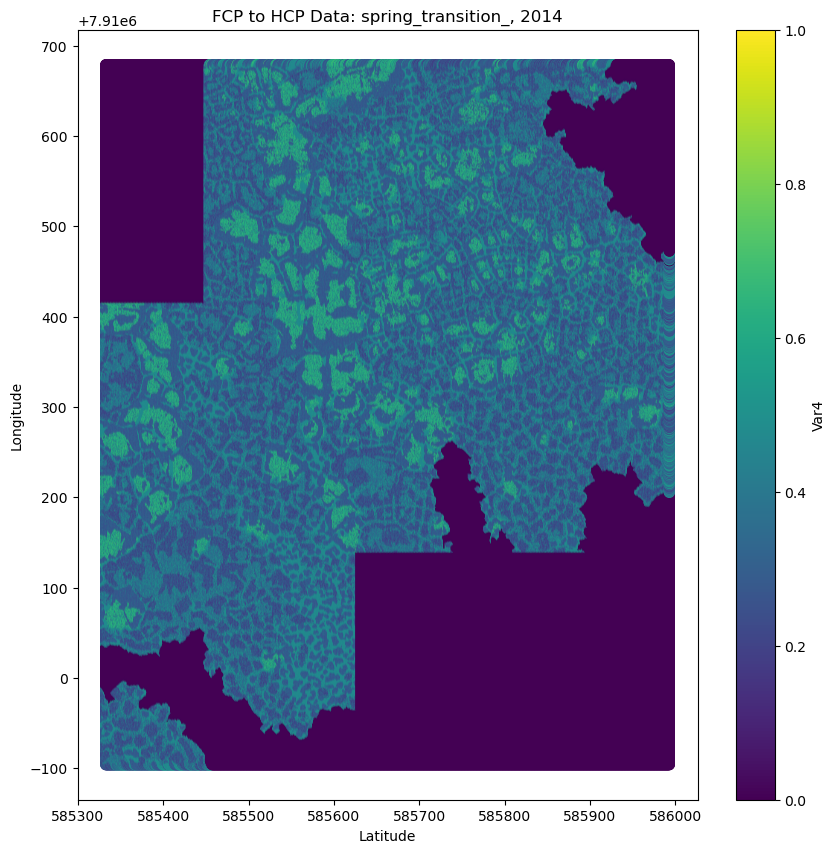

In [84]:
plt.figure(figsize=(10, 10))
filtered_df_LCP = LCP_to_HCP[(LCP_to_HCP['Day'] == 'spring_transition_') & (LCP_to_HCP['Year'] == '2014')]

scatter = plt.scatter(filtered_df_LCP['e05'], filtered_df_LCP['e06'], c = filtered_df_LCP['Var4'], cmap= 'viridis', s=50, vmin=0, vmax=1)
plt.colorbar(scatter, label = 'Var4')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("FCP to HCP Data: spring_transition_, 2014")
plt.show()


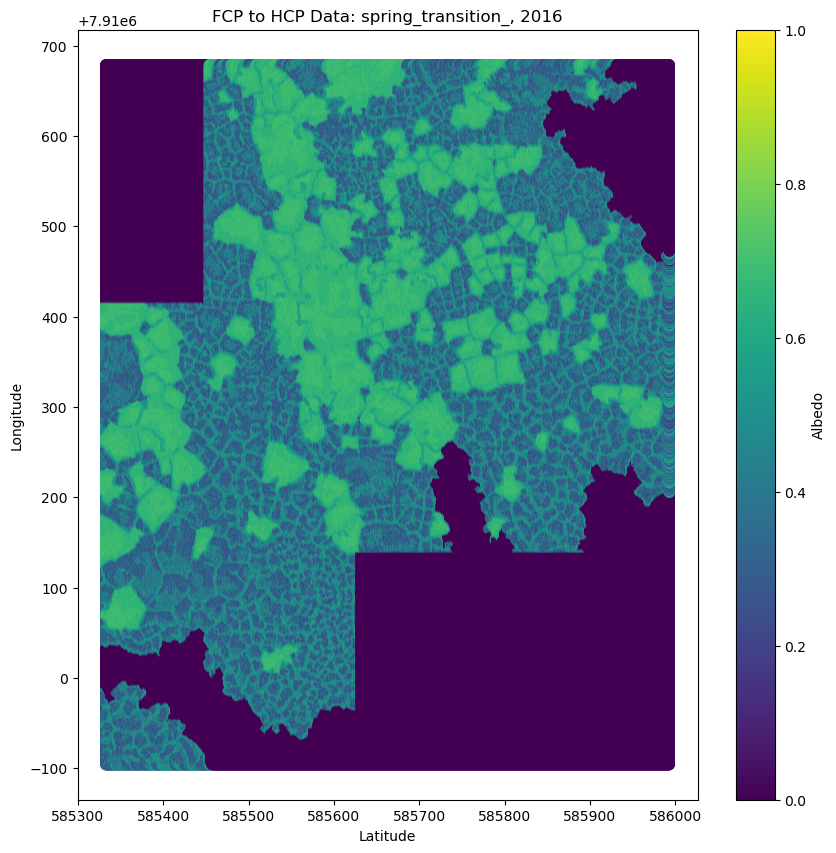

In [85]:
plt.figure(figsize=(10, 10))
filtered_df_HCP = FCP_to_HCP[(FCP_to_HCP['Day'] == 'spring_transition_') & (FCP_to_HCP['Year'] == '2016')]

scatter = plt.scatter(filtered_df_HCP['e05'], filtered_df_HCP['e06'], c = filtered_df_HCP['Var4'], cmap= 'viridis', s=50, vmin=0, vmax=1)
plt.colorbar(scatter, label = 'Albedo')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("FCP to HCP Data: spring_transition_, 2016")
plt.show()


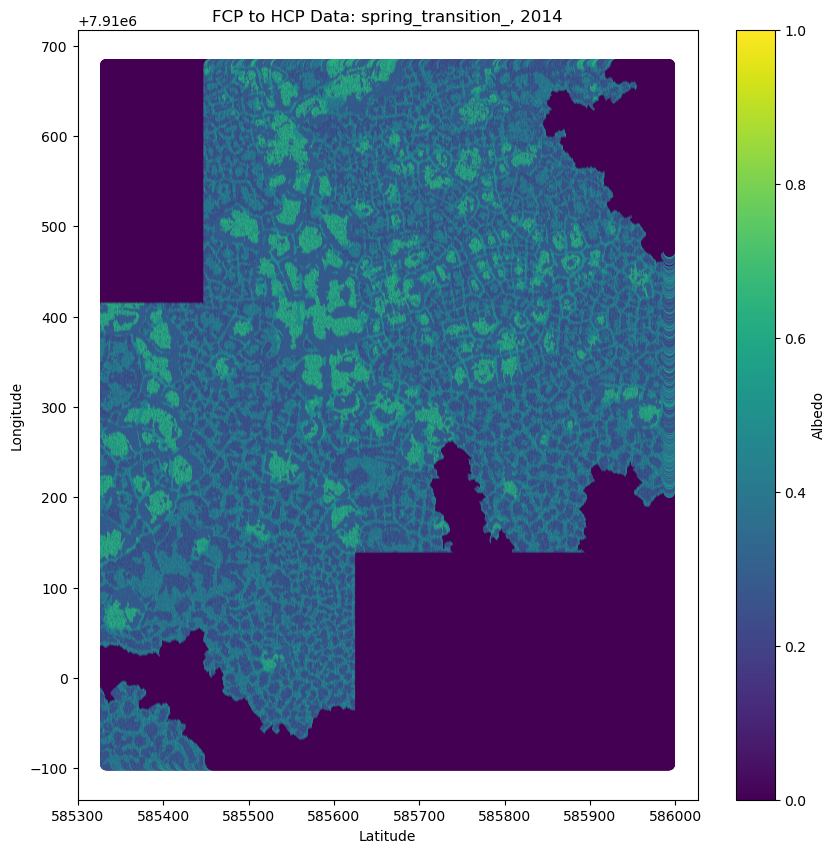

In [86]:
plt.figure(figsize=(10, 10))
filtered_df_HCP = FCP_to_HCP[(FCP_to_HCP['Day'] == 'spring_transition_') & (FCP_to_HCP['Year'] == '2014')]

scatter = plt.scatter(filtered_df_HCP['e05'], filtered_df_HCP['e06'], c = filtered_df_HCP['Var4'], cmap= 'viridis', s=50, vmin=0, vmax=1)
plt.colorbar(scatter, label = 'Albedo')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("FCP to HCP Data: spring_transition_, 2014")
plt.show()


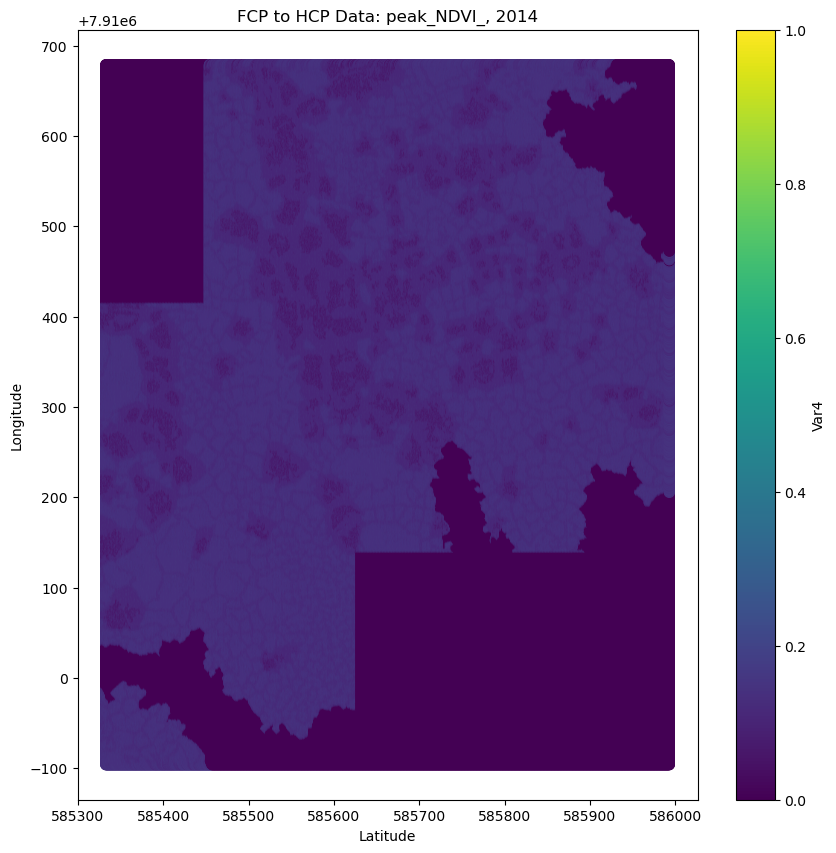

In [87]:
plt.figure(figsize=(10, 10))
filtered_df_HCP = FCP_to_HCP[(FCP_to_HCP['Day'] == 'peak_NDVI_') & (FCP_to_HCP['Year'] == '2014')]

scatter = plt.scatter(filtered_df_HCP['e05'], filtered_df_HCP['e06'], c = filtered_df_HCP['Var4'], cmap= 'viridis', s=50, vmin=0, vmax=1)
plt.colorbar(scatter, label = 'Var4')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("FCP to HCP Data: peak_NDVI_, 2014")
plt.show()


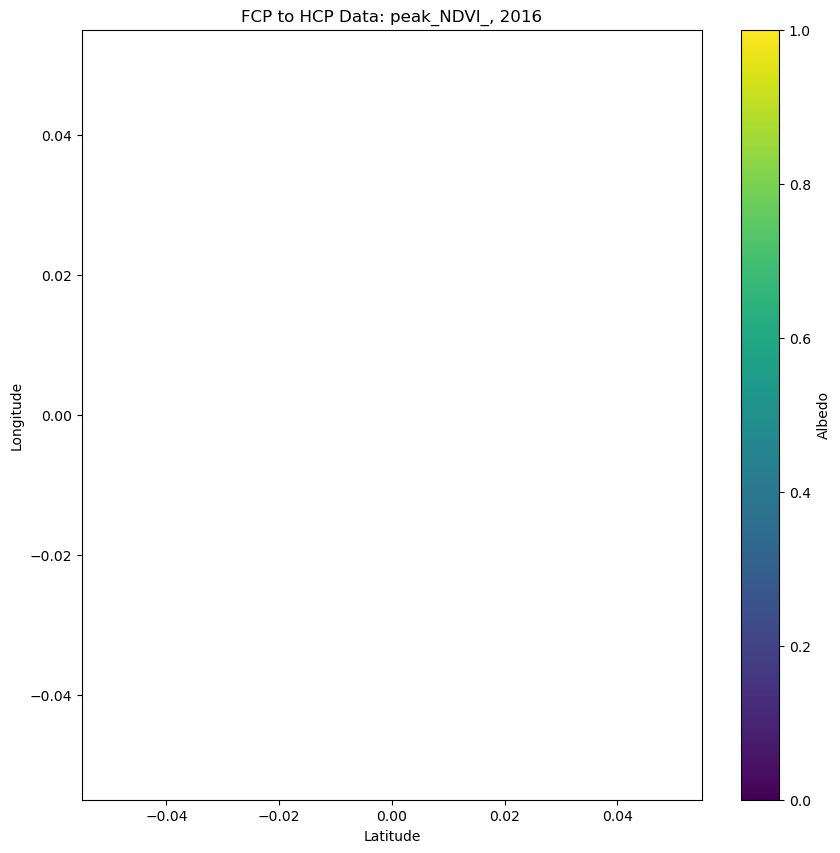

In [88]:
plt.figure(figsize=(10, 10))
filtered_df_HCP = FCP_to_HCP[(FCP_to_HCP['Day'] == 'peak_NDVI_') & (FCP_to_HCP['Year'] == '2016')]

scatter = plt.scatter(filtered_df_HCP['e05'], filtered_df_HCP['e06'], c = filtered_df_HCP['Var4'], cmap= 'viridis', s=50, vmin=0, vmax=1)
plt.colorbar(scatter, label = 'Albedo')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("FCP to HCP Data: peak_NDVI_, 2016")
plt.show()


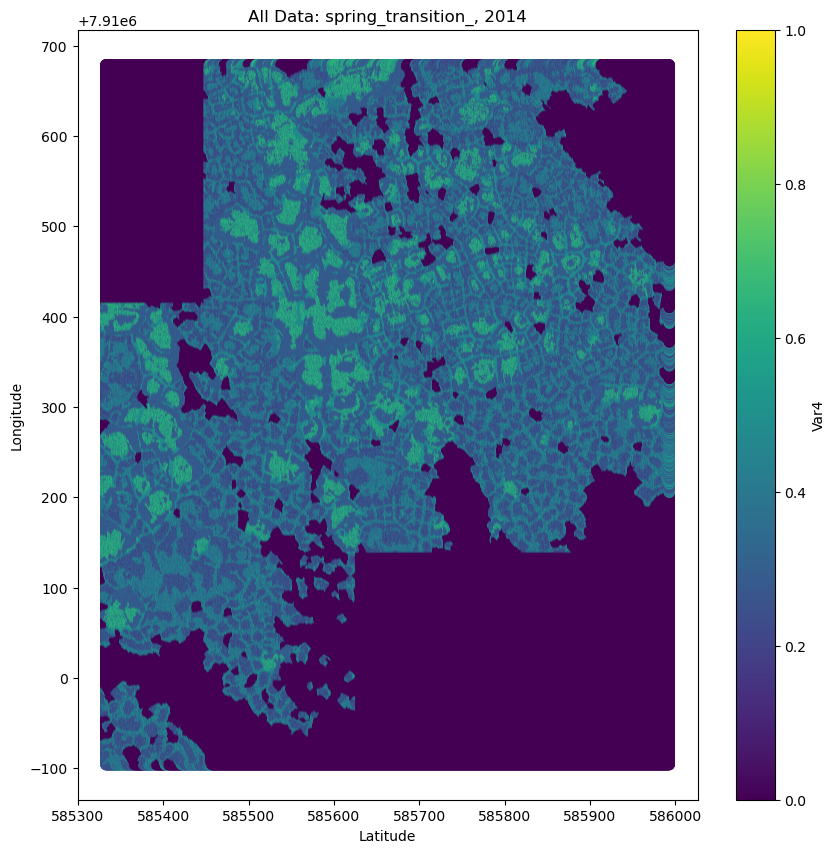

In [89]:
plt.figure(figsize=(10, 10))
filtered_df_all = all_data[(all_data['Day'] == 'spring_transition_') & (all_data['Year'] == '2014')]

scatter = plt.scatter(filtered_df_all['e05'], filtered_df_all['e06'], c = filtered_df_all['Var4'], cmap= 'viridis', s=50, vmin=0, vmax=1)
plt.colorbar(scatter, label = 'Var4')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("All Data: spring_transition_, 2014")
plt.show()


In [90]:
diff_df = pd.DataFrame()
diff_df['Var4'] = filtered_df_LCP['Var4'] - filtered_df_HCP['Var4']
diff_df['e05'] = filtered_df_all['e05']
diff_df['e06'] = filtered_df_all['e06']

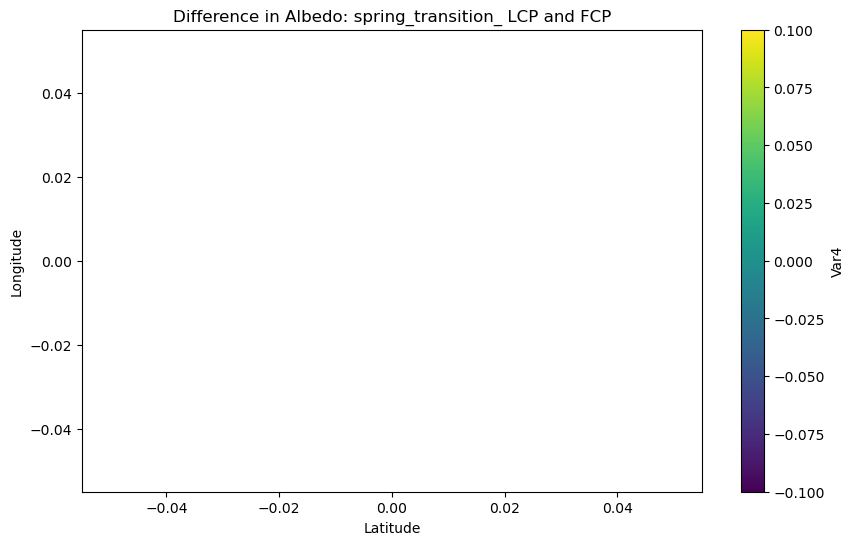

In [91]:
plt.figure(figsize = (10, 6))
scatter = plt.scatter(diff_df['e05'], diff_df['e06'], c = diff_df['Var4'], cmap= 'viridis', s=50)
plt.colorbar(scatter, label = 'Var4')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Difference in Albedo: spring_transition_ LCP and FCP")
plt.show()